# Plotting with Python

Jupyter notebook - https://github.com/ScottWales/training - under 'plotting'

This is an overview of how to create plots using Pyplot in Python.

I'm not going to go much into the whys of plotting - what the best way is to communicate your data, but this is something you should be keeping in mind whenever you're trying to communicate your science. See e.g. [Rougier et al (2014) doi:10.1371/journal.pcbi.1003833](https://dx.doi.org/10.1371%2Fjournal.pcbi.1003833)

To start off with let's load some libraries and test data. I've aliased `matplotlib.pyplot` to `plt`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

In [2]:
x = numpy.linspace(0,10)
y = numpy.sin(x)
z = numpy.cos(3*x)

Line plots can be made using [`plot()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html). I'm using Jupyter with `%matplotlib inline` so the plots show automatically, if you're using a script you need to call [`show()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) for the plots to appear

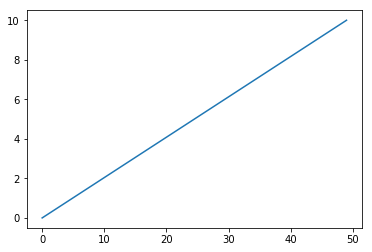

In [3]:
# In Jupyter, after `%matplotlib inline`
plt.plot(x)

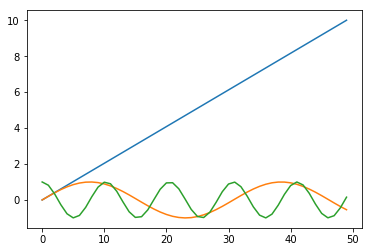

In [6]:
# In a script
plt.plot(x)
plt.plot(y)
plt.plot(z)
plt.show()

# Plotting Options

There's a lot of options for formatting plots as you like:

 - Line types
 - Axis Labels and Titles
 - Plot limits
 - Figure size

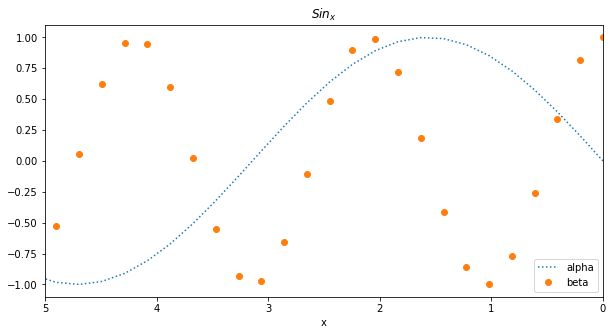

In [21]:
plt.figure(figsize=(10,5))
plt.plot(x, y, ':', label = 'alpha')
plt.plot(x, z, 'o', label = 'beta')
plt.title('$Sin_x$')
plt.xlabel('x')
plt.xlim([5,0])
plt.legend()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


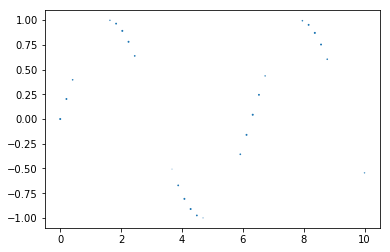

In [22]:
plt.scatter(x,y,z)

## 2D Plots

Pyplot has a number of functions for working with 2d datasets

- [`imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html): Plot regularly spaced data
- [`pcolormesh()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html): Plot irregularly spaced data
- [`contour()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html): Contour plot
- [`contourf()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html): Filled contour plot

You can set colour maps using the `cmap=` argument, colour limits using `vmin=` and `vmax=`. If you're making multiple plots to compare with each other make sure these are consistent

[`colorbar()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html) will add a colour bar to a plot

Here's a spherical harmonic to experiment with:

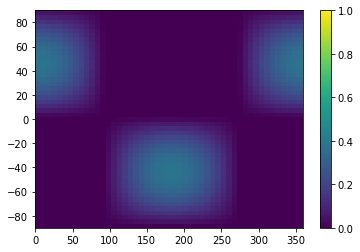

In [35]:
import scipy.special

x = numpy.linspace(0, 2*numpy.pi)
y = numpy.linspace(0, numpy.pi)

lon = numpy.rad2deg(x)
lat = numpy.rad2deg(y-numpy.pi/2.0)

(X,Y) = numpy.meshgrid(x, y)
Y_12 = scipy.special.sph_harm(1, 2, X, Y)

plt.pcolormesh(lon, lat, numpy.real(Y_12), vmin=0, vmax=1)
plt.colorbar()

In [36]:
x

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

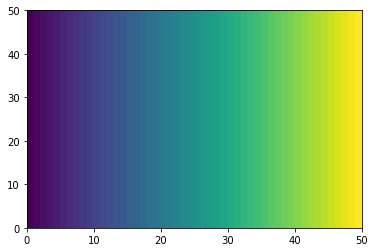

In [38]:
plt.pcolormesh(X)

## Projections

When working with climate data you may want to put it onto a map projection. Cartopy is the library to use for this.

To project a plot you need to specify the projections of both your input data as well as the plot - to do this we create a pyplot axis with [`axes()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axes.html) and specify a `projection=`.

To tell pyplot what projection your input dataset is on use the `transform=` argument in a plotting function - a regular lat-lon grid uses the [`PlateCarree()`](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#platecarree) projection.

A list of available projections are available in the [Cartopy documentation](https://scitools.org.uk/cartopy/docs/latest/)

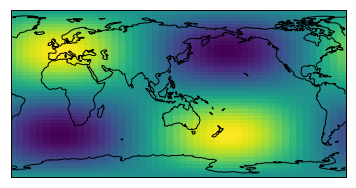

In [67]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=130))
plt.pcolormesh(lon, lat, numpy.real(Y_12), transform=ccrs.PlateCarree())

ax.coastlines()

## Proj

Behind the scenes Cartopy uses a projection library called [Proj](https://proj.org/). If you can't find the projection you want check the Proj documentation, it is pretty comprehensive in what transformations it can do.

You can create a new Cartopy projection from a list of Proj parameters using [`cartopy.crs.Projection()`](https://scitools.org.uk/cartopy/docs/latest/crs/index.html#cartopy.crs.Projection).

## Plotting Xarray data

Xarray DataArrays have built in pyplot support, they will create a plot with automatic axis labelling based on the DataArray's metadata



In [41]:
import xarray

ds = xarray.open_mfdataset('/g/data/al33/replicas/CMIP5/combined/MOHC/HadGEM2-A/amip/mon/atmos/Amon/r1i1p1/v20131108/ta/ta_Amon_HadGEM2-A_amip_r1i1p1_*.nc')
ds.ta

<xarray.DataArray 'ta' (time: 364, plev: 17, lat: 144, lon: 192)>
dask.array<shape=(364, 17, 144, 192), dtype=float32, chunksize=(363, 17, 144, 192)>
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 3e+03 2e+03 1e+03
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * time     (time) object 1978-09-16 00:00:00 ... 2008-12-16 00:00:00
Attributes:
    standard_name:     air_temperature
    long_name:         Air Temperature
    units:             K
    original_name:     mo: m01s30i204/m01s30i301
    cell_methods:      time: mean
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

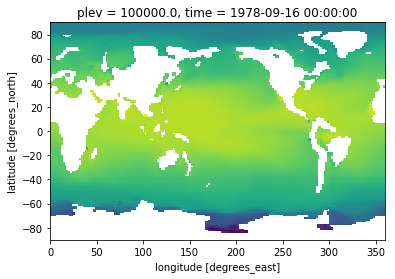

In [46]:
ds.ta.isel(plev=0, time=0).plot.pcolormesh(add_colorbar=False)

The plot created depends on the dimensions of the data array - 1d arrays get [`plot()`](http://xarray.pydata.org/en/stable/generated/xarray.plot.line.html), 2d arrays get [`pcolormesh()`](http://xarray.pydata.org/en/stable/generated/xarray.plot.pcolormesh.html).

You can get a specific plot type using e.g. [`data.plot.contourf()`](http://xarray.pydata.org/en/stable/generated/xarray.plot.contourf.html)

Turn off the default colour bar or labels using `add_colorbar=False` or `add_labels=False` respectively

## Making Pretty Plots

There's a wide range of options for styling your plots to your liking. The best way I can recommend to see what's possible is to take a look at the various galleries of plot styles - you can click on a plot to see how it was created

* [Matplotlib Gallery](https://matplotlib.org/gallery.html)
* [Cartopy Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)
* [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

## Other Stuff

### Saving plots to file

Save a plot with [`savefig(filename)`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)

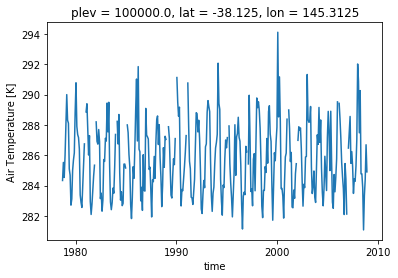

In [50]:
ds.ta.isel(plev=0).sel(lat=-37.8, lon=144.9, method='nearest').plot()

plt.savefig('melb_temp.jpg')

### Subplots

Create multiple plots that share an axis with [`subplots()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots)


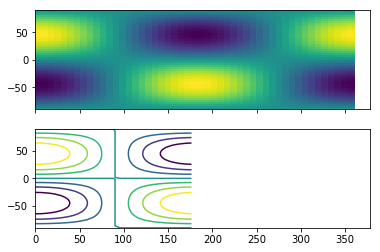

In [54]:
fig, axes = plt.subplots(2, 1, sharex=True )

axes[0].pcolormesh(lon, lat, numpy.real(Y_12))

axes[1].contour(lon[0:25], lat, numpy.real(Y_12[:,0:25]))


### Hatching

Hatch an area (e.g. to show confidence) on a 2d plot by using the base [`pcolor()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolor.html) function with `hatch=` - this needs the X and Y values to be supplied as 2d arrays (`pcolormesh()` is faster, but doesn't support hatching)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


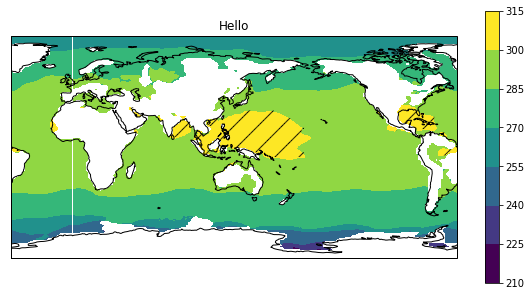

In [74]:
ta = ds.ta.isel(plev=0, time=0)
significant = ta.where(ta > 300)

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=130))

contour = ta.plot.contourf(transform=ccrs.PlateCarree(), add_colorbar=False)
plt.colorbar(contour)
plt.title('Hello')

X, Y = numpy.meshgrid(ta.lon, ta.lat)
plt.pcolor(X, Y, significant, hatch='/', alpha=0, transform=ccrs.PlateCarree())
ax.coastlines()

In [66]:
significant.values

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)